# Final Project

Joy Wang, Stephanie Wang, Lucinda Zhou 

CMSC320

# Data Curation and Parsing

In [8]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [9]:
# read in data and store as a dataframe
df = pd.read_csv('https://pandemicdatalake.blob.core.windows.net/public/curated/covid-19/covid_tracking/latest/covid_tracking.csv')

# remove deprecated columns based on data documentation
df = df.drop(df.columns[df.columns.str.contains('increase')], axis=1)
df = df.drop(labels=['date_checked','hospitalized','pos_neg','total'], axis=1)

df.head()

,date,state,positive,negative,pending,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,...,data_quality_grade,last_update_et,hash,death,total_test_results,fips,fips_code,iso_subdivision,load_time,iso_country
0,2021-03-07,AK,56886.0,NaN,NaN,33.0,1293.0,NaN,NaN,2.0,...,NaN,2021-03-05 03:59:00,dc4bccd4bb885349d7e94d6fed058e285d4be164,305.0,1731628.0,2,2,US-AK,2022-01-11 00:04:58,US
1,2021-03-07,AL,499819.0,1931711.0,NaN,494.0,45976.0,NaN,2676.0,NaN,...,NaN,2021-03-07 11:00:00,997207b430824ea40b8eb8506c19a93e07bc972e,10148.0,2323788.0,1,1,US-AL,2022-01-11 00:04:58,US
2,2021-03-07,AR,324818.0,2480716.0,NaN,335.0,14926.0,141.0,NaN,65.0,...,NaN,2021-03-07 00:00:00,50921aeefba3e30d31623aa495b47fb2ecc72fae,5319.0,2736442.0,5,5,US-AR,2022-01-11 00:04:58,US
3,2021-03-07,AS,0.0,2140.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2020-12-01 00:00:00,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0.0,2140.0,60,60,US-AS,2022-01-11 00:04:58,US
4,2021-03-07,AZ,826454.0,3073010.0,NaN,963.0,57907.0,273.0,NaN,143.0,...,NaN,2021-03-07 00:00:00,0437a7a96f4471666f775e63e86923eb5cbd8cdf,16328.0,7908105.0,4,4,US-AZ,2022-01-11 00:04:58,US


For our final project, we decided to analyze the dataset from the COVID Tracking project, which is one of the open datasets from Microsoft. We utilized the CSV version of the dataset, and used pandas read_csv() to read and parse the csv file into a pandas dataframe. 

While reading Microsoft's documentation for this dataset, we noticed that some columns were described as "Deprecated", so we did some preliminary data cleaning by dropping those columns from the datafram using the drop() function.

# Joy's Work in Progress :))

In [10]:
# lin reg models and hypothesis testing
# consider: how am i dealing with nan? by removing rows with nan values in the columns im modeling

# dropping unnecessary columns for my linear regression models
lrdata = df.drop(df.columns[df.columns.str.contains('cumulative|iso')], axis=1)
lrdata = lrdata.drop(labels=['pending','data_quality_grade','last_update_et','hash','fips','fips_code','load_time'], axis=1)
lrdata

,date,state,positive,negative,hospitalized_currently,in_icu_currently,on_ventilator_currently,recovered,death,total_test_results
0,2021-03-07,AK,56886.0,NaN,33.0,NaN,2.0,NaN,305.0,1731628.0
1,2021-03-07,AL,499819.0,1931711.0,494.0,NaN,NaN,295690.0,10148.0,2323788.0
2,2021-03-07,AR,324818.0,2480716.0,335.0,141.0,65.0,315517.0,5319.0,2736442.0
3,2021-03-07,AS,0.0,2140.0,NaN,NaN,NaN,NaN,0.0,2140.0
4,2021-03-07,AZ,826454.0,3073010.0,963.0,273.0,143.0,NaN,16328.0,7908105.0
...,...,...,...,...,...,...,...,...,...,...
22256,2020-01-17,WA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22257,2020-01-16,WA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22258,2020-01-15,WA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22259,2020-01-14,WA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# getting a list with all unique states
states = lrdata['state'].unique()

# create new dataframe with averages for each state
state_avgs = pd.DataFrame(columns=['state', 'positive_avg','hospitalized_currently_avg','recovered_avg','death_avg'])
state_avgs['state'] = states
state_avgs.head()

,state,positive_avg,hospitalized_currently_avg,recovered_avg,death_avg
0,AK,NaN,NaN,NaN,NaN
1,AL,NaN,NaN,NaN,NaN
2,AR,NaN,NaN,NaN,NaN
3,AS,NaN,NaN,NaN,NaN
4,AZ,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Positive Cases', ylabel='Currently Hospitalized'>

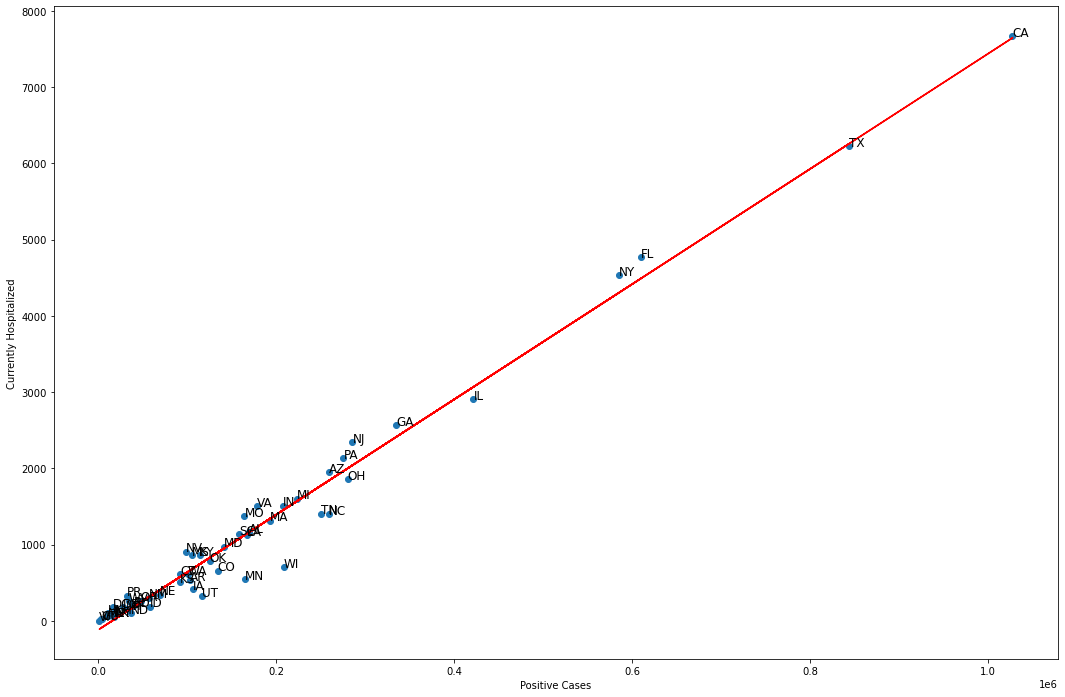

In [34]:
# calculating averages for each of these columns for each state
for column in ['positive','hospitalized_currently','recovered','death']:
    # dropping rows with NaN values in the current column we are operating on
    lrdata_col = lrdata.dropna(subset=[column])
    # there are 56 states, and we will iterate through them
    for i in range(56):
        # create a dataframe that only contains rows for the current state
        state = states[i]
        lrdata_state = lrdata_col[lrdata_col['state'] == states[i]]
        # calculate the average for this state and this column
        average = lrdata_state[column].mean()
        # insert the average value into the dataframe where we are storing averages for each state
        state_avgs.at[i, (column+'_avg')] = average
state_avgs.head()
# FINISHED CREATING THE AVGS TABLE!!!

# lin reg for positive to hospitalization relationship
# remove NaN values for columns used in lin reg model
avgs_hospital = state_avgs.dropna(subset=['positive_avg','hospitalized_currently_avg'])
avgs_hospital = avgs_hospital.reset_index(drop=True)
x = pd.to_numeric(avgs_hospital['positive_avg'])
y = pd.to_numeric(avgs_hospital['hospitalized_currently_avg'])
# create plot for positive to hospitalization relationship
fig, ax = plt.subplots()
ax.scatter(x,y)
for i, txt in enumerate(avgs_hospital.state):
    ax.annotate(txt, (x[i], y[i]), fontsize = 12)
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b, color="red")
ax.set_xlabel("Positive Cases")
ax.set_ylabel("Currently Hospitalized")
fig.set_figwidth(18)
fig.set_figheight(12)
ax

As expected, there appears to be a linear relationship between positive cases and the numbers of people who are currently hospitalized. The states with their point above this line have more positive cases and less hospitalized than the lin reg model, meaning that they are doing well at mitigating hospitalization among positive cases in comparison to other states. These states include WI, MN, UT, TN, NC.

In [ ]:
# continue this analysis for recovery and death
# see if there's a state that does consistently well

# Stephanie's WIP

We can't do k means analysis on non numerical variables, so we can drop those. 

In [ ]:
mldata = df.copy()
mldata = mldata.drop(
    labels=['data_quality_grade', 'last_update_et', 'hash', 'load_time', 'iso_subdivision', 'iso_country'], 
    axis=1
)
mldata.head()

In [ ]:
mldata = mldata.drop(
    labels=['date', 'hospitalized_currently', 'in_icu_currently', 'on_ventilator_currently', 'fips', 'fips_code'], 
    axis=1
)
mldata.head()

Getting cumulative values for each column 

In [ ]:
bystate = mldata.groupby('state').max()
bystate

In [ ]:
bystate = bystate.dropna(axis=1)
bystate

In [ ]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
# y_km = km.fit_predict(X)